<a target="_blank" href="https://colab.research.google.com/github/ArtificialIntelligenceToolkit/aitk/blob/master/notebooks/BasicNeuralNets.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks and Machine Learning

We will explore a simple data set consisting of 6x6 images of the digits 0-9. We will see how to represent these digits so that we can train a neural network to categorize each image as either a zero, one, two, three, four, five, six, seven, eight, or nine.

## What is this thing?

This is a `Notebook` running Python.

Each block of text or code makes up a "cell". You can execute a cell by pressing SHIFT+ENTER or if you are executing this notebook in Google Colab you can press the arrow to the left of the cell.

You can enter some math, such as `2 * 12` and let Python tell you the answer. Try it!


In [1]:
2 * 10

20

Each cell has an input and an output section. Try going back to the above cell and changing the numbers. Simply press SHIFT+ENTER again, and the number in the output section will change.

## Getting ready to do Machine Learning

You will need to install some software in order to build a neural network. We will be using a software package called `aitk` which stands for Artificial Intelligence Toolkit.  This is a Python package for constructing and visualizing deep learning models.

The `aitk` package is built on top of `Keras`, which is built on top of `Tensorflow`.  Both `Keras` and `Tensorflow` are popular ML frameworks, but can be overwhelming for beginners.  The `aitk` package was created to be easier and more intuitive for beginners.

**Remember that for every cell, you should continue to press SHIFT-ENTER to execute that cell.**

In [2]:
%pip install aitk --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.2/454.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00


In [3]:
from aitk.utils import array_to_image, get_dataset, gallery
from aitk.networks import SimpleNetwork
import numpy as np

## Let's get started on our task of learning to recognize digits

Below is a series of 1's and 0's meant to represent the digit seven. If you trace the 1's with your finger they should look like a 7.

In [4]:
digit = [
  [0, 1, 1, 1, 1, 0],
  [0, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 1, 0],
]

We can turn this series of numbers into an image. Each 1 will be converted into a white pixel and each 0 will be converted into a black pixel.  Below is a rendering of these numbers as an image. This original image is quite small, so we are resizing it to make it easier to see. Now it should be obvious that this is a seven.

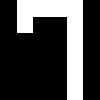

In [5]:
array_to_image(digit).resize((100,100), 0)

In the cell below is a blank digit template filled with all 0's.  Replace some of the 0's with 1's to make your own digit.

In [6]:
my_digit = [
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
]

Let's turn your digit into an image and see how it looks.

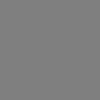

In [7]:
array_to_image(my_digit).resize((100,100), 0)

Feel free to play around with your digit until you are happy with how it looks.  We will use this image later to test how well our neural network has learned.

Note that each row has 6 numbers separated by commas, and that there are a total of 6 rows.

**QUESTION:** How many different images could we make with these tiny 6x6 matrices?

**ANSWER:** If we only allow either a 0 or 1 then there are 2 possible values for each location and there are 36 locations, so that is 2 multiplied by itself 36 times, which is a very big number!

In [8]:
2 ** 36

68719476736


## Getting the data set

In order to train a neural network we need some data. One semester, I had each student in my AI class create their own set of ten 6x6 digit images.  There were 24 students in the class so we ended up with a total of 240 images (24 examples of each digit).

Note that this is a very small data set by deep learning standards, but given that it is small it will be quick to train and easier to analyze.

In [9]:
inputs, targets = get_dataset("digits6x6")

8192it [00:00, 14997703.35it/s]


Here is the first example in the data set (note that in Computer Science we always start counting at 0).  Can you tell what digit it is?

In [10]:
inputs[0]

array([[0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0]])

We will be doing **supervised learning**, meaning that for every input example we will provide the correct answer. The correct response is called the *target*. Remember that we are trying to train our algorithm to recognize 10 different digits. We will represent our target as a *one-hot* vector. If the first value is a 1, that indicates that the right answer is zero.  If the next value is a 1, that indicates that the right answer is one. And so on. If the final value is a 1, that indicates that the right answer is nine.

In [11]:
targets[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

As you can see above, based on the target provided, the first example is supposed to be a zero. Let's look at the next example, and its associated target.

In [12]:
inputs[1]

array([[0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1]])

In [13]:
targets[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

Here is a gallery of images showing the entire data set of 240 examples. Notice that some of the digits are easier for us to recognize than others.

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175

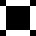
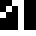
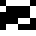
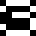
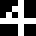
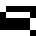
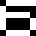
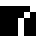
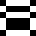
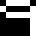
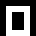
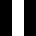
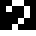
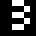
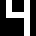
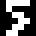
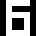
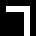
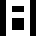
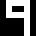
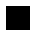
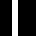
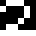
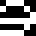
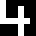
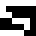
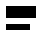
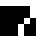
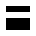
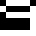
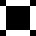
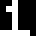
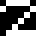
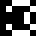
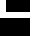
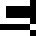
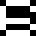
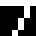
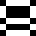
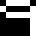
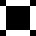
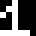
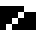
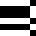
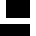
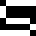
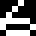
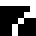
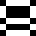
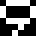
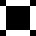
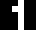
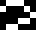
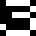
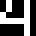
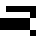
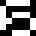
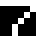
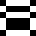
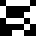
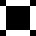
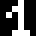
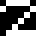
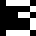
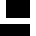
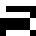
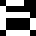
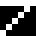
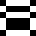
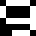
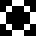
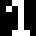
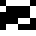
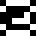
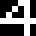
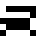
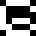
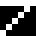
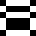
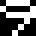
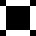
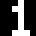
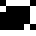
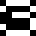
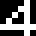
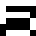
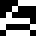
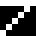
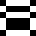
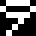
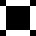
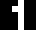
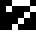
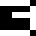
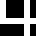
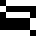
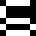
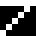
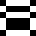
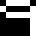
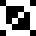
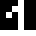
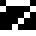
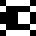
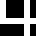
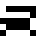
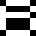
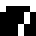
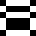
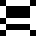
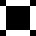
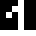
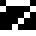
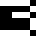
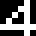
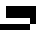
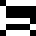
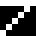
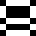
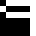
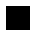
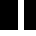
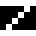
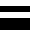
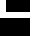
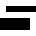
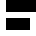
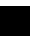
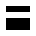
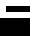
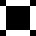
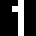
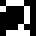
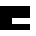
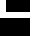
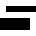
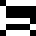
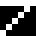
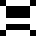
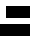
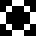
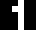
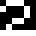
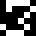
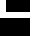
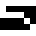
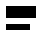
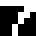
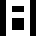
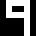
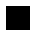
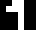
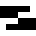
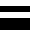
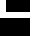
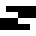
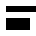
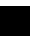
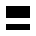
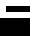
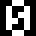
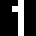
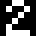
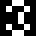
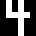
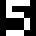
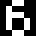
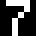
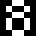
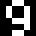
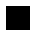
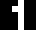
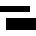
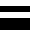
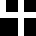
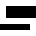
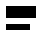
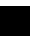
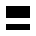
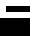
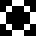
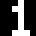
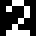
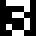
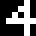
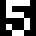
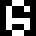
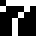
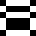
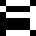
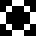
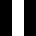
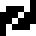
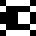
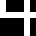
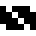
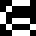
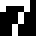
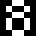
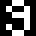
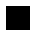
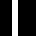
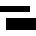
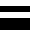
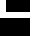
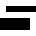
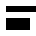
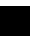
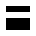
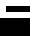
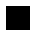
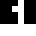
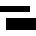
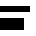
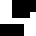
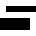
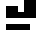
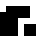
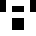
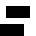
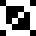
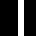
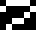
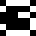
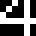
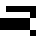
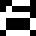
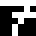
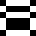
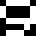
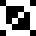
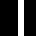
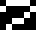
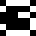
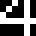
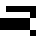
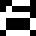
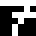
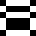
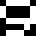

In [14]:
images = [array_to_image(inputs[i]) for i in range(len(inputs))]
bigger = [image.resize((36,36), resample=0) for image in images]
gallery(bigger)

## Validation data

When training a neural network it is important to determine when to stop training. You might think that having the highest possible accuracy on the training data would be our goal. However, this might lead to **overtraining**, causing the network to **overfit** the given data and be unable to **generalize** to novel data.

Typically you also have a **validation** set of data, in addition to the training data. The neural network never gets to train on the this validation set. Instead we use it to monitor how well the network is generalizing. If the network's performance on the validation set starts to decline, then we know that it is time to stop training.

Let's grab a small validation set that we can use to monitor our network's learning progress.

In [15]:
test_inputs, test_targets = get_dataset("validate_6x6")

8192it [00:00, 13727422.44it/s]


0,1,2,3
4,5,6,7
8,9,,

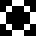
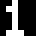
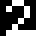
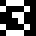
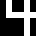
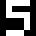
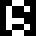
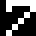
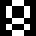
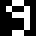

In [16]:
test_images = [array_to_image(test_inputs[i]) for i in range(len(test_inputs))]
test_bigger = [image.resize((36,36), resample=0) for image in test_images]
gallery(test_bigger)

## Building a Neural Network

Our network (or more generally, a "model") will have the following layers:

* 6 x 6 input layer
* "flatten" layer to convert from 2 dimensions to 1 dimension
* hidden layer
* 10-unit output layer

We'll define a function to build our network. We know what size the input layer should be and what size the output layer should be, but it isn't clear how big the hidden layer should be. By defining this function it makes it easier for us to experiment with the hidden layer size.

In [17]:
def build_network(hidden_layer_size):
    return SimpleNetwork(
        (6,6),
        "Flatten",
        hidden_layer_size,
        (10, "softmax")
    )

 This is a function that, when called, will return a "network" (or "model"). This model has 4 layers as described above. The output layer is designed to output 1 winner, and 9 losers---which matches the 10 digits. You can think of the output as a probability of which digit the network thinks the input data represents.

Now, we construct a network with a 10-unit hidden layer:

In [18]:
net = build_network(10)

A neural network is a series of layers connected by initially random weights.

The goal of the learning process is to incrementally tweak these weights so that the output of the network more closely matches the targets provided for each input. The network accomplishes this via the back-propagation method which changes the weights to reduce the error between the actual output and the desired target output.

We can look at a summary of the network to see how many weights it contains in each layer as well as the total number of trainable parameters.

If you make the hidden layer size larger, then the total number of trainable parameters will increase.  

In [19]:
net.summary()

Model: "SimpleNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 6, 6)]            0         
                                                                 
 flatten (Flatten)           (None, 36)                0         
                                                                 
 hidden_2 (Dense)            (None, 10)                370       
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 480 (1.88 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We can also visualize the network's layers and the current activation of every neuron in the network.

In the image below, the brighter the color the more active the neuron is. Notice that at first the output layer's activations are very muted. This is because we haven't yet trained the network on this data so it has no idea how to respond to any of the inputs.

In [20]:
net.display(inputs[0])

## Training the Neural Network

Now we are ready to actually train the network on this data set. Notice in the cell below that we have specifed the number of epochs to be 1000.  This represents how many times the network will go through our data set of 240 example digits. Each time it will place an example digit on the input layer, propagate the values forward through the weights until it produces values at the output layer.  It will compare that output to the target and calculate the error. Then it will propagate that error backwards through the network adjusting the weights so as to reduce the error.

As the network trains it will display two graphs showing you on the left how error is (hopefully) decreasing over time, and on the right how accuracy is (hopefully) increasing over time.

It will also show us how the network is doing on the validation data. Remember that the network is never trained on this data, so it's performance will likely be worse on this data. However if the validation loss ever starts to climb up or the validation accuracy starts to fall, then we are likely at the point of over training.

In [21]:
net.fit(
    inputs, targets,
    batch_size=16,
    report_rate=100,
    epochs=1000,
    accuracy=1.0,
    tolerance=0.2,
    validation_data=(test_inputs,test_targets)
)

Epoch 1000/1000 loss: 0.002076978562399745 - tolerance_accuracy: 0.9666666388511658 - val_loss: 0.02979998290538788 - val_tolerance_accuracy: 0.6000000238418579


## Testing the Network

Let's start by seeing how the trained network does on the validation set. The following code will run through the 10 test images one by one with a one second delay. Feel free to change the `sleep` command to a higher number if you'd like more time to view the results.

In [22]:
from time import sleep
def test_all():
  for i in range(10):
    net.display(test_inputs[i])
    outputs = net.propagate(test_inputs[i])
    print(", ".join([str(round(v,2)) for v in outputs]))
    sleep(2)

In [23]:
test_all()

0.0, 0.0, 0.0, 0.29, 0.01, 0.01, 0.0, 0.01, 0.02, 0.65


Now let's look at some specific examples from the training set and see how well the network is doing now that you have found a good hidden layer size to achieve high accuracy.

The function `prediction`, which is defined below, allows us to test any valid example from our data set (numbered 0-239).  Try some different numbers. Notice that for most examples, the output layer will clearly have selected one answer over all of the others.

For a few examples, the network may not be able to accurately predict the correct digit. For instance, try input number 23, which is an unusual looking nine, or input number 160, which is a zero that is not centered in the input.

The numbers printed below the picture of the network show you the actual output values, which we can interpret as probabilities of the output being each of the digits.

In [24]:
def prediction(index):
  net.display(inputs[index])
  outputs = net.propagate(inputs[index])
  print(", ".join([str(round(v,2)) for v in outputs]))

In [25]:
prediction(23)

0.06, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.45, 0.48


## Does the network generalize its learning to novel data?

Let's test how well the network will do on your digit that you constructed earlier in this notebook.  Remember that the network was never trained on this image.  So if the network can recognize this digit, this is evidence that it can **generalize** what it has learned to novel input.

In [26]:
net.display(my_digit)
outputs = net.propagate(my_digit)
print(", ".join([str(round(v,2)) for v in outputs]))

0.06, 0.38, 0.03, 0.06, 0.05, 0.01, 0.01, 0.38, 0.0, 0.01


## Problems with the Network

Hopefully the network did successfully recognize your digit (unless you purposefully made it challenging). It should be able to generalize to data that is similar to what it was trained on.

However, let's see how the network responds to completely new data that is quite different from what it was trained on. For instance, here is a checkerboard image:

In [27]:
checkerboard_image = [
  [1, 0, 1, 0, 1, 0],
  [0, 1, 0, 1, 0, 1],
  [1, 0, 1, 0, 1, 0],
  [0, 1, 0, 1, 0, 1],
  [1, 0, 1, 0, 1, 0],
  [0, 1, 0, 1, 0, 1],
]

In [28]:
net.display(checkerboard_image)
outputs = net.propagate(checkerboard_image)
print(", ".join([str(round(v,2)) for v in outputs]))

0.0, 0.0, 0.0, 0.0, 0.98, 0.0, 0.01, 0.0, 0.0, 0.0


The network may categorize the checkerboard as a particular digit, such as a four or a five with a realitvely high probability, which is problematic.  Why does this happen? Part of the answer has to do with how we set the network up. We only trained it with examples of real digits. And its output probabilities must always going to add up to 1. So even if an image doesn't look like any of the digits, it has to essentially pick one of them as its answer. Let's see if we can make some modifications to at least get a sense of how to fix this problem. First we'll explore the idea of automatically creating "bad" data, which in this case will help the network learn about non-digits.

## Creating random data

The checkerboard has a strong pattern which is one reason that it may have resonated with one of our digits. But how will the network respond to more random data?  Let's find out. We've created a function to generate random data by essentially flipping a coin at every location, and when that coin turns out heads we set that location to be a 1 otherwise we leave it at 0.  

In [29]:
from random import random

In [30]:
def generate_random_data():
  array = np.zeros((6,6))
  for i in range(6):
    for j in range(6):
      if random() < 0.5:
        array[i][j] = 1.0
  return array

The next cell will generate some random data and then display it.  Try re-executing it several times to see the different types of images it creates. They likely won't look much like digits but with randomness they actually could.

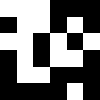

In [31]:
test = generate_random_data()
array_to_image(test).resize((100,100), 0)

Now its time to test the network on random digits.

In [32]:
test = generate_random_data()
net.display(test)
outputs = net.propagate(test)
print(", ".join([str(round(v,2)) for v in outputs]))

0.01, 0.0, 0.0, 0.0, 0.02, 0.0, 0.96, 0.0, 0.01, 0.0


## Re-Train the Network to Categorize Both Digits and Non-Digits

Let's re-train the network and provide it with examples of data that are not digits. To do this we'll replace all of the examples of the digit zero in the original data set with randomly generated data. Our goal is for the network to choose 0 with high probability when the input data is **not** a digit.

The obvious downside of this strategy is that we will no longer be able to recognize 0s. If we were going to do this in a proper network we would simply increase the size of our output layer to 11. Unfortunately this would require redoing our dataset and making some other sizable changes. To keep it simple we'll just do without the 0s.

This next cell with replace every tenth digit (the 0s) with random data.

In [33]:
for i in range(24):
  inputs[i*10] = generate_random_data()

Here's what the updated data set looks like. Notice that the inputs at 0, 10, 20, and so on are now all random images. Keep in mind that if you re-ran the function in the previous cell you would get different results. Similarly, other students in our class will all get different results.


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47
48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143
144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175

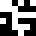
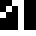
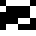
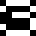
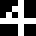
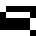
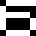
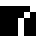
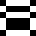
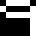
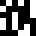
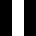
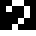
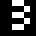
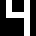
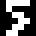
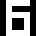
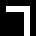
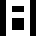
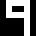
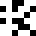
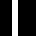
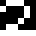
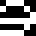
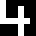
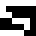
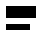
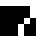
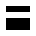
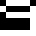
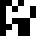
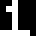
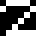
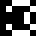
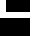
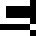
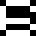
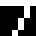
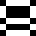
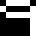
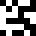
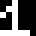
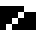
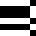
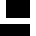
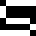
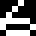
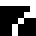
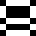
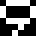
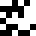
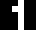
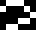
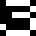
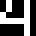
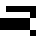
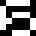
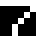
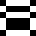
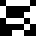
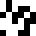
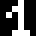
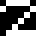
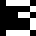
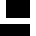
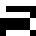
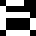
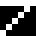
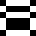
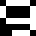
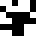
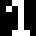
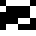
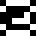
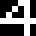
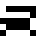
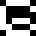
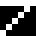
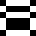
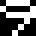
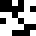
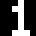
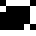
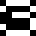
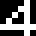
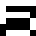
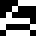
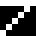
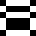
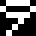
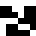
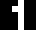
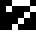
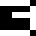
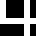
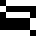
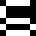
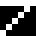
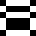
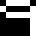
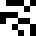
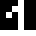
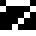
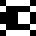
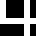
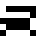
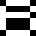
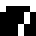
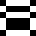
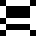
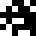
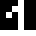
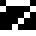
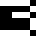
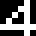
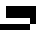
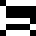
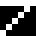
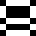
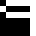
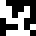
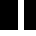
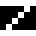
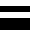
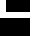
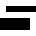
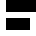
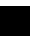
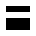
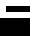
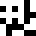
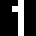
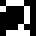
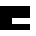
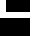
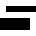
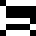
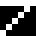
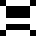
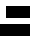
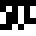
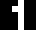
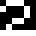
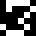
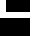
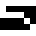
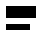
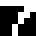
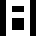
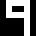
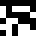
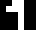
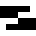
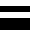
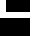
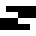
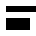
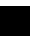
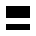
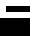
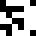
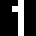
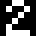
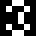
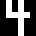
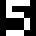
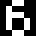
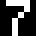
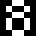
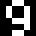
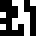
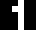
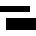
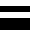
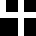
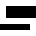
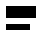
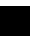
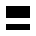
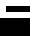
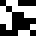
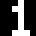
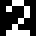
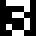
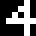
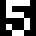
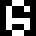
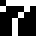
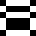
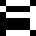
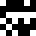
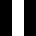
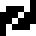
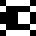
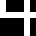
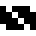
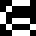
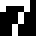
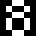
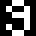
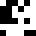
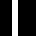
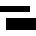
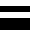
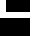
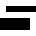
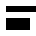
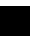
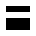
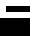
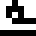
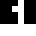
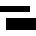
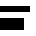
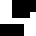
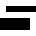
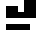
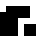
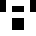
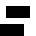
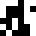
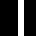
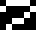
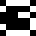
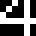
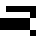
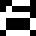
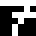
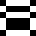
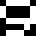
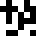
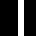
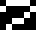
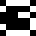
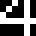
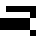
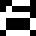
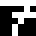
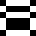
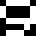

In [34]:
images = [array_to_image(inputs[i]) for i in range(len(inputs))]
bigger = [image.resize((36,36), resample=0) for image in images]
gallery(bigger)

Let's build a new network to train on this new version of the data set.

Replace the hidden layer size below with the one you think works best given your earlier experiments.

In [35]:
net2 = build_network(10)

In [36]:
net2.summary()

Model: "SimpleNetwork"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 6, 6)]            0         
                                                                 
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 hidden_2 (Dense)            (None, 10)                370       
                                                                 
 output (Dense)              (None, 10)                110       
                                                                 
Total params: 480 (1.88 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
net2.fit(
    inputs, targets,
    batch_size=16,
    report_rate=100,
    epochs=1000,
    accuracy=1.0,
    tolerance=0.2,
    validation_data=(test_inputs,test_targets)
)

Epoch 1000/1000 loss: 0.0026288372464478016 - tolerance_accuracy: 0.949999988079071 - val_loss: 0.03410140797495842 - val_tolerance_accuracy: 0.6000000238418579


Now that we've trained up our network let's do what we would do if we were building a neural network to use in a real machine learning implementation - we need to test how good the network is on things that we have not trained on. In this case let's generate some new random digits and see how we do. In truth we should also test out some real digits too.

In [38]:
test = generate_random_data()
net2.display(test)
outputs = net2.propagate(test)
print(", ".join([str(round(v,2)) for v in outputs]))

0.01, 0.0, 0.0, 0.0, 0.01, 0.0, 0.85, 0.0, 0.12, 0.0


## **Exercise**: Testing on non-digits

a) Try executing the code cell above 10 times and report the output with the highest value in a list like the one below. For example, if the outputs at the bottom of the cell were: 0.92, 0.01, 0.02, 0.0, 0.0, 0.0, 0.03, 0.0, 0.02, 0.0 for your first test you would report: 1. 0, 92%.

1.   
2.   
3.
4.
5.
6.
7.
8.
9.
10.

b) How many times out of 10 did the updated network correctly classify the random data as non-digits?  

c) Were there some random images that the network still reported as digits?  Did they look anything like the actual digit?

### Try the checkerboard on the updated network

Let's see how our second network does on the checkerboard image. Hopefully it will recognize that it is **not** a digit by outputting a high probability for the answer 0.




In [39]:
net2.display(checkerboard_image)
outputs = net2.propagate(checkerboard_image)
print(", ".join([str(round(v,2)) for v in outputs]))

0.7, 0.0, 0.0, 0.0, 0.28, 0.0, 0.0, 0.0, 0.0, 0.01


## Limitations of this simple network

One important caveat is that this simple network is not taking advantage of the two-dimensional structure of the images. Recall that our first layer flattened the image. There are newer approaches called **convolutional** networks that are designed to handle two dimensional data. They develop feature detectors that would make it possible to recognize digits that weren't centered in the image and which might be different sizes or orientations. These convolutional networks would be able to generalize more successfully to a wide variety of digit depictions.

## **Exercise:** Reflection

a. Describe an aspect of neural networks or machine learning that you now understand more clearly as a result of experimenting with the digits recognizing neural network in this notebook.


b. Describe an aspect of neural networks or machine learning that is still unclear to you.
